In [16]:
from framework import DynamicSystem, StaticSystem
from sources import Step, WhiteNoise
from diagram import DiagramSystem
from analysis import Simulator, plot_trajectory
import numpy as np

In [17]:
from tests import Pendulum, Step, WhiteNoise, PDController, Integrator, PropController

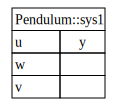

In [18]:
# Plant system
sys = Pendulum()
sys.params['m'] = 1.0
sys.params['l'] = 5.0
sys.x0[0] = 2.0

sys

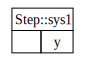

In [19]:
# Source input
step = Step()
step.params['initial_value'] = np.array([0.0])
step.params['final_value'] = np.array([1.0])
step.params['step_time'] = 10.0

step

In [20]:
# Closed loop system
ctl = PDController()
ctl.params['Kp'] = 1000.0
ctl.params['Kd'] = 100.0

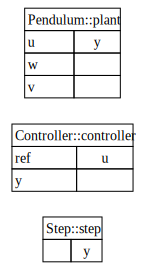

In [21]:
# Diagram
diagram = DiagramSystem()

diagram.add_subsystem(step,"step")
diagram.add_subsystem(ctl,'controller')
diagram.add_subsystem(sys,'plant')

diagram

In [22]:
sim = Simulator(diagram, t0=0, tf=20, dt=0.01)
sim.solve(show=True)

Simulator:
--------------
Simulating system Diagram from t=0 to t=20
Time steps = 2002, dt=0.01 and solver= scipy


Connected step:y to controller:ref


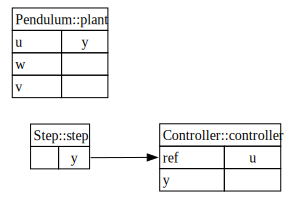

In [23]:
diagram.connect('step','y','controller','ref')
diagram

Connected controller:u to plant:u


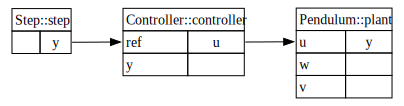

In [24]:
diagram.connect('controller','u','plant','u')
diagram

In [25]:
sim = Simulator(diagram, t0=0, tf=20, dt=0.01)
sim.solve(show=True)

Simulator:
--------------
Simulating system Diagram from t=0 to t=20
Time steps = 2002, dt=0.01 and solver= scipy


Connected plant:y to controller:y


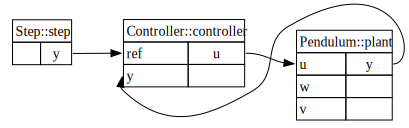

In [26]:
diagram.connect('plant','y','controller','y')
diagram

In [27]:
sim = Simulator(diagram, t0=0, tf=20, dt=0.01)
sim.solve(show=True)

Simulator:
--------------
Simulating system Diagram from t=0 to t=20
Time steps = 2002, dt=0.01 and solver= scipy
